<a href="https://colab.research.google.com/github/saimasharleen/labfinal/blob/master/uberandstudentperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas, data cleaning and Matplotlib


(1) a Uber dataset which contains trip records spanning from 2009 to 2015, including the fare, pick-up time, pick-up and drop-off locations of each trip. (Source: https://www.kaggle.com/yasserh/uber-fares-dataset)

(2) a students' performance dataset on standardized test: https://www.kaggle.com/spscientist/students-performance-in-exams, containing the math, reading and writing scores, gender, parental level of education, etc.



In [ ]:
# Here are the imports you will need for starting your notebook.
# It is up to you to import more packages or something else needed to complete a task.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#connecting Google Drive with Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Dataset 1
### Task 1. Preprocessing (4 marks)

First, start by reading the Uber dataset. You wil find the time information is presented in two columns (key and pickup_datetime). Besides, data in the first column (Unnamed:0) will not be helpful to our analytics. Therefore, your first task is to remove the column *'Unnamed:0'* and the column named *'key'*. You can choose between removing these columns in-place or not but your result must be stored in a variable called **'trips'**. At the end of this task, you must print your entire dataframe that will look like the one below.

<img src="images/task1-result.png" width=80% height= auto>


In [ ]:
trips = pd.read_csv('/content/gdrive/My Drive/Data/uber.csv')
del trips['Unnamed: 0']
del trips['key']
# final print
trips

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


### Task 2. Preprocessing (8 marks)
Format the datetime column "pickup_datetime" and only keep the date (format will be `YY-mm-dd`). For example the "2015-05-07 19:52:06 UTC" and "2015-05-07 19:52:06.0000003" will be formatted to "2015-05-07". 
*Hint:* The data type in the datetime column is a string, you can use the methods `str.strip` to remove the UTC string (source: https://python-reference.readthedocs.io/en/latest/docs/str/strip.html) and `datetime.strptime` (source: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) to help you parsing the string to the format requested. 

Finally, print your dataframe and the result must look like the following.

<img src="images/task2-result.png" width=80% height= auto>

In [ ]:
date_st = [dates.strip("UTC ") for dates in trips['pickup_datetime']]
trips['pickup_datetime'] = [datetime.strptime(dates, '%Y-%m-%d %H:%M:%S') for dates in date_st]
trips['pickup_datetime'] = trips['pickup_datetime'].dt.date

# final print
trips

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20,-73.997124,40.725452,-73.983215,40.695415,1


### Task 3. Preprocessing (3 marks)
Now, sort the dataframe **'trips'** based on the *pickup_datetime* date ascending and print the head with 10 examples.

Your dataframe must look like the following.

<img src="images/task3-result.png" width=80% height= auto>

In [ ]:
trips.sort_values(by='pickup_datetime', ascending=True, inplace=True, ignore_index=True)
trips.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,6.10,2009-01-01,-73.975759,40.749823,-73.982534,40.738737,1
1,10.10,2009-01-01,-73.982492,40.757212,-73.997370,40.719370,3
2,9.30,2009-01-01,-73.998807,40.713696,-73.993580,40.752576,1
3,7.80,2009-01-01,-73.980338,40.766303,-73.975158,40.745811,2
4,8.50,2009-01-01,-73.972600,40.749377,-73.981393,40.721997,1
5,8.50,2009-01-01,-73.981918,40.779456,-73.957685,40.771043,2
6,7.70,2009-01-01,-73.962266,40.779096,-73.975849,40.752208,2
7,32.65,2009-01-01,-73.872978,40.774098,-73.982055,40.762908,3
8,4.50,2009-01-01,-73.988440,40.740365,-73.986823,40.730197,1
9,4.60,2009-01-01,-73.965825,40.754429,-73.972814,40.749124,2


### Task 4. Computation (10 marks)

Calculate distances between the pick-up and drop-off locations. Locations are represented in latitude and longitude and ideally the Haversine distance would give a more accurate result. However, since the location is a reduced area (not the entire planet), we request that you implement the euclidean distance here. Therefore, create a new column named *'distance'* that calculates for each record the euclidean distance between two geolocations (i.e., in our case, pickup and dropoff locations). 

$euclideanDistance(lat1, lon1, lat2, lon2)   = \sqrt {(lat_1-lat_2)^2 + (lon_1-lon_2)^2}$

Finally, you must print the last 10 rows of your dataframe and it must look like the one below. 
<img src="images/task4-result.png" width=80% height= auto>

In [ ]:
from math import sqrt

lat1 = trips['pickup_latitude']
lon1 = trips['pickup_longitude']
lat2 = trips['dropoff_latitude']
lon2 = trips['dropoff_longitude']
trips['distance'] = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)
trips.tail(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
199990,7.00,2015-06-30,-73.964020,40.777203,-73.980034,40.770542,1,0.017344
199991,20.50,2015-06-30,-73.967888,40.792416,-74.003708,40.732464,1,0.069838
199992,75.54,2015-06-30,-73.703262,40.653118,-73.703285,40.653126,1,0.000024
199993,18.50,2015-06-30,-73.991684,40.754646,-73.948006,40.801373,1,0.063962
199994,6.00,2015-06-30,-73.978477,40.783051,-73.970085,40.799614,5,0.018568
199995,11.50,2015-06-30,-73.961136,40.756756,-73.982857,40.771587,1,0.026302
199996,8.50,2015-06-30,-73.955315,40.804562,-73.942322,40.828529,1,0.027263
199997,4.50,2015-06-30,-73.963081,40.766251,-73.969421,40.764351,5,0.006619
199998,9.00,2015-06-30,-74.005302,40.745792,-73.980911,40.730751,1,0.028656
199999,9.50,2015-06-30,-73.982468,40.772266,-73.976784,40.790325,2,0.018932


### Task 5. Selection and Masks (7 marks)

Select all the records in January 2014 and store it in a variable called *'trip_jan14'*. Finally print your dataframe that must look like the one below.

<img src="images/task5-result.png" width=80% height= auto>

In [ ]:
start = pd.to_datetime("2014-01-01").date()
end = pd.to_datetime("2014-01-31").date()
trip_jan14 = trips.loc[(trips['pickup_datetime'] >= start) & (trips['pickup_datetime'] <= end)]
# your final print
trip_jan14

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
156266,8.5,2014-01-01,-73.995383,40.720680,-73.995978,40.736200,2,0.015531
156267,4.0,2014-01-01,-73.981798,40.765092,-73.976987,40.764897,3,0.004815
156268,26.0,2014-01-01,-73.976075,40.759432,-74.007680,40.740772,6,0.036702
156269,22.5,2014-01-01,-73.982268,40.745457,-74.004782,40.706950,1,0.044606
156270,5.5,2014-01-01,-73.970427,40.752365,-73.981125,40.747937,2,0.011578
...,...,...,...,...,...,...,...,...
158755,14.0,2014-01-31,-73.962542,40.772987,-73.977230,40.758917,6,0.020340
158756,8.0,2014-01-31,-73.982534,40.756929,-73.987059,40.760832,1,0.005976
158757,6.0,2014-01-31,-73.982652,40.745070,-73.973608,40.751503,1,0.011099
158758,15.0,2014-01-31,-74.006410,40.743883,-73.987823,40.756271,2,0.022337


### Task 6. Selection and Masks (7 marks)

In this task you **must exclude rows from the variable 'trip_jan14'** that will be considered outliers. The outliers in this task are considered the values below quantile 5% and above quantile 95% for the columns 'distance' and 'fare_amount'. Therefore, you must select all rows that are within the range 5% and 95% of this two columns.

*hint:* Dataframes and series have a function quantile that you can pass as the argument the value you are requesting. (source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html). 

You must create a new dataframe with those values removed named *'trip_outliers'*. Finally, print your dataframe stored in 'trip_filtered' and it must look like the one below. 

<img src="images/task6-result.png" width=80% height= auto>

In [ ]:
fare_low = trip_jan14['fare_amount'].quantile(0.05)
fare_hi = trip_jan14['fare_amount'].quantile(0.95)
dist_low = trip_jan14['distance'].quantile(0.05)
dist_hi = trip_jan14['distance'].quantile(0.95)

trip_outliers = trip_jan14[(trip_jan14["distance"] < dist_hi) & (trip_jan14["distance"] > dist_low) & (trip_jan14['fare_amount'] < fare_hi) & (trip_jan14['fare_amount'] > fare_low)]
trip_filtered = trip_outliers
# your final print
trip_filtered

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
156266,8.5,2014-01-01,-73.995383,40.720680,-73.995978,40.736200,2,0.015531
156268,26.0,2014-01-01,-73.976075,40.759432,-74.007680,40.740772,6,0.036702
156269,22.5,2014-01-01,-73.982268,40.745457,-74.004782,40.706950,1,0.044606
156270,5.5,2014-01-01,-73.970427,40.752365,-73.981125,40.747937,2,0.011578
156271,17.0,2014-01-01,-73.945873,40.801373,-73.973143,40.743863,1,0.063648
...,...,...,...,...,...,...,...,...
158754,8.5,2014-01-31,-73.967885,40.763388,-73.955567,40.783161,1,0.023296
158755,14.0,2014-01-31,-73.962542,40.772987,-73.977230,40.758917,6,0.020340
158756,8.0,2014-01-31,-73.982534,40.756929,-73.987059,40.760832,1,0.005976
158757,6.0,2014-01-31,-73.982652,40.745070,-73.973608,40.751503,1,0.011099


### Task 7. Data Visualization (plot: 8 marks, answer: 3 marks)

Create two scatter plots for the fare amount in y-axis and trip distances in x-axis using the two dataframes, without the outliers (i.e., stored in variable 'trip_filtered') and with the outliers (i.e., stored in variable 'trip_jan14'). 

What can you observe from the plot below? Why is it important is to exclude the outliers for understanding the data? Could you observe a trend in your plot and what is your observation? 

**A: Write your answer here**

Your final plot must look like the one below. 

<img src="images/task7-result.png" width=80% height= auto>

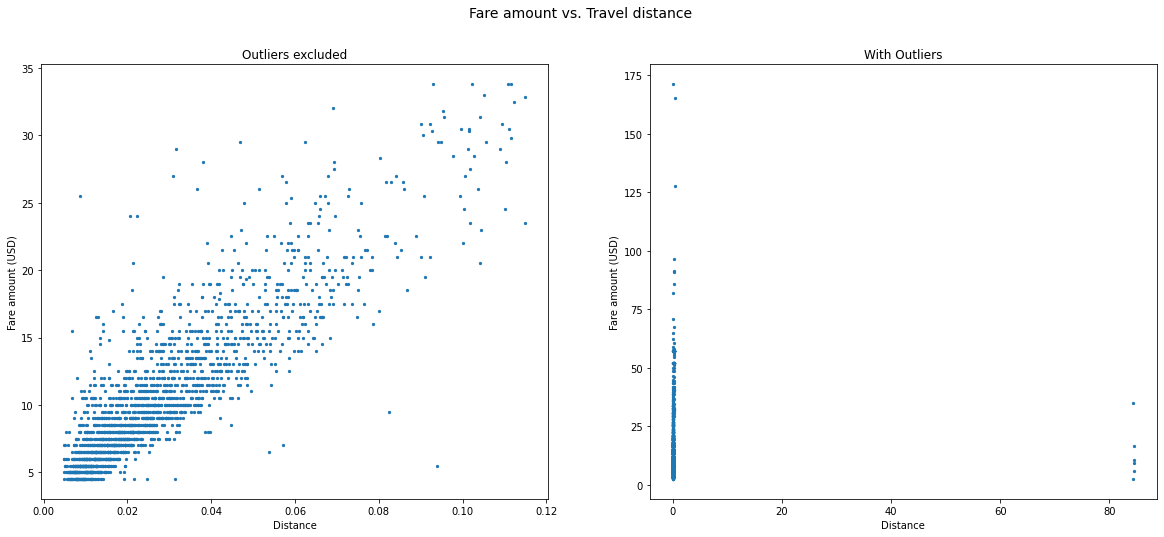

In [ ]:
fig, ax1 = plt.subplots(1,2, figsize=(20,8))
trip_filtered.plot.scatter(x='distance', y='fare_amount', s=5, ax=ax1[0], title="Outliers excluded", 
                           xlabel="Distance", ylabel="Fare amount (USD)")
trip_jan14.plot.scatter(x='distance', y='fare_amount', s=5, ax=ax1[1], title="With Outliers",
                           xlabel="Distance", ylabel="Fare amount (USD)")
plt.suptitle("Fare amount vs. Travel distance", fontsize=14)
plt.show()

## Dataset 2

### Task 8. Data Aggregation and sorting (8 marks)

Read the dataset of with students' performance ('StudentsPerformance.csv') on a standardized test and store in a variable called 'students'. 

First, calculate the average score for each student using the three grades ('math_score', 'reading_score', 'writing_score') and put the result in a new column named 'avg_score'. 

After sort the dataset based on this 'avg_score' and print your variable 'students'. 

Your final print must look like the one below. 

<img src="images/task8-result.png" width=80% height= auto>

In [ ]:
students = pd.read_csv('/content/gdrive/My Drive/Data/StudentsPerformance.csv')
students['avg_score'] = students[['math_score','reading_score','writing_score']].mean(axis=1)
students.sort_values(by=['avg_score'], inplace=True, ignore_index=True)
students
# your final print
students

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,male,group B,high school,free/reduced,none,30,24,15,23.000000
3,male,group A,some college,free/reduced,none,28,23,19,23.333333
4,male,group E,some high school,standard,none,30,26,22,26.000000
...,...,...,...,...,...,...,...,...,...
995,female,group D,some high school,standard,completed,97,100,100,99.000000
996,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
997,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
998,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000


### Task 9. MultiIndex (8 marks)
In this task you will explore the influence of lunch supplies on students' (exam) test performance using the file 'StudentsPerformance.csv'. Follow the steps and solve the tasks listed below:

First, calculate the average score by groups (A ~ E) and lunch, this operation will produce a multiindex object. Then reset the index to form a new dataframe looks like the one below:
<img src="images/task9-1-result.png" width=30% height= auto>


In [ ]:
students_lunch = students.groupby(['race/ethnicity','lunch'])['avg_score'].mean().reset_index()
# your final print
students_lunch

,race/ethnicity,lunch,avg_score
0,group A,free/reduced,57.657407
1,group A,standard,66.616352
2,group B,free/reduced,60.975845
3,group B,standard,68.030303
4,group C,free/reduced,60.412281
5,group C,standard,70.868293
6,group D,free/reduced,64.666667
7,group D,standard,71.746507
8,group E,free/reduced,67.495935
9,group E,standard,74.929293


### Task 10. Reshape (10 marks)

Reshape the above data for the step 3, make the lunch type ('free/reduced' and 'standard') to be the column names and average scores to be the cell values. The reshaped data will look like:
<img src="images/task9-2-result.png" width=30% height= auto>

*Hint.* The `pivot` function may help you achieve the goal: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html



In [ ]:
lunch_df = students_lunch.pivot(index='race/ethnicity', columns='lunch', values='avg_score')
# your final print
lunch_df

lunch,free/reduced,standard
race/ethnicity,,
group A,57.657407,66.616352
group B,60.975845,68.030303
group C,60.412281,70.868293
group D,64.666667,71.746507
group E,67.495935,74.929293


### Task 11. Visualization (10 marks)

Create a horizontal bar chart looks as follows. Please make sure to include the basic elements (title, legend, labels).

**Now answer the following questions. What can you observe from the barchart below? Could you identify a trend or pattern? Please describe it.**

**A: Write your answer here**

<img src="images/task9-3-result.png" width=60% height= auto>

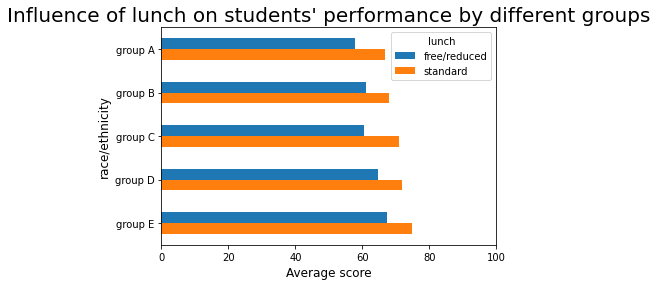

In [ ]:
fig, ax = plt.subplots()
lunch_df.plot.barh(ax=ax)
ax.set(xlim=(0,100), xlabel="Average score")
plt.gca().invert_yaxis()
ax.set_title("Influence of lunch on students' performance by different groups", size=20)
ax.set_xlabel(xlabel="Average score", size=12)
ax.set_ylabel(ylabel="race/ethnicity", size=12)
ax.legend(loc="upper right", title="lunch");

### Task 12. Visualization (14 marks)

In this task, you will explore the relationship between students' test scores and the education level of their parents. Produce a violinplot looks like the one below.

*Note.* Pandas data framework does not include embedded violinplot, you need to carefully refer to Matplotlib violinplot API and format your data for visualization.

**Now answer the following question. Could you identify a trend or pattern in the boxplot below? Please describe it with your own words.**

**A: Write your answer here**

<img src="images/task10-result.png" width=60% height= auto>

In [ ]:
edu_df = [students[students.parental_level_of_education == 'some high school']['avg_score'].values,
          students[students.parental_level_of_education == 'high school']['avg_score'].values,
          students[students.parental_level_of_education == 'some college']['avg_score'].values,
          students[students.parental_level_of_education == "associate's degree"]['avg_score'].values,
          students[students.parental_level_of_education == "bachelor's degree"]['avg_score'].values,
          students[students.parental_level_of_education == "master's degree"]['avg_score'].values]       

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


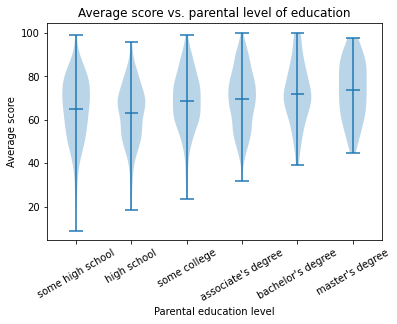

In [ ]:
labels = ["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"]
pos = np.arange(1,7)
fig, ax = plt.subplots()
ax.violinplot(dataset=edu_df, showmeans=True)
ax.set(xlabel="Parental education level", ylabel="Average score")
plt.title("Average score vs. parental level of education")
plt.xticks(pos, labels, rotation=30)
plt.show()